# **Transcribir a texto un audio y vídeo usando Whisper de Open AI en Google Colab**

* *Versión: 1.0*
* *Fecha: Abril 2024*
* *Autor: Gorki González Canales*

Recuerde que antes de operar con este código, debe de elegirse un procesamiento en base a GPU vs a CPU. El GPU irá más rápido que el CPU. La rapidez de trabajo es de una relación 3:1, es decir tres horas de audio en MP3 demora una hora whisper en procesarlo, aproximadamente.

Para ello, se debe elegir **T4 GPU** como entorno de ejecuión, tal como se muestra en la siguiente imagen.

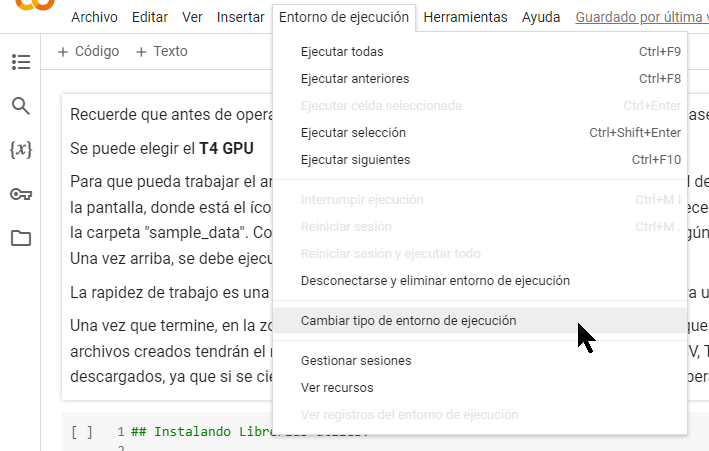

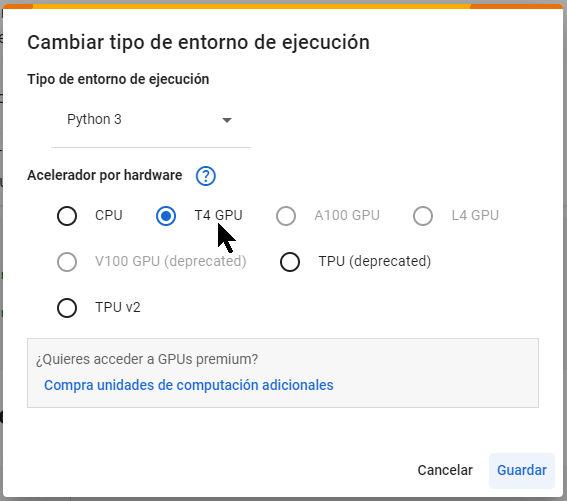

Ya con el entorno de ejecución configurado, se puede comenzar a utilizar este Notebook.

# **Pasos**

# **Paso 1 - Instalando las librerías que harán la magia.**

La ejecución de la siguiente celda tomará su tiempo, que serán unos minutos.

In [ ]:
## Instalando Librerías útiles:

!pip install git+https://github.com/openai/whisper.git # Instala Whisper

!sudo apt update && sudo apt install ffmpeg # Permite que colab pueda trabajar o procesar los archivos multimedia

!pip install mutagen # Para conocer las características del archivo MP3 subido

print('\n¡TODO LISTO! Puedes continuar.')

#**Paso 2 - Subir el archivo Audio (MP3, OGG o WAV) o Vídeo (MP4) que se pasará a texto.**

**Whisper no trabaja bien con otros formatos de archivos que no sean los ya nombrados**. Si el archivo no tiene ese formato, deberá de pasarlo a uno de los formatos nombrados.

In [ ]:
from google.colab import files
import os

# Cargar el archivo de audio
uploaded = files.upload()

# Ahora puedes procesar tu archivo de audio como desees
for fn in uploaded.keys():
  length_mbytes = len(uploaded[fn]) / 1_000_000
  print(f'El usuario cargó el archivo "{fn}" con un tamaño de {length_mbytes:.3f} MB')

  # Guardar el archivo en el sistema de archivos de Colab
  with open(fn, 'wb') as f:
    f.write(uploaded[fn])

# Verificar que el archivo está en el directorio de trabajo
!ls -lh

#**Paso 3 - Para ver las características del archivo subido.**
**Válido solo para archivos MP3 o MP4**. Si entrega error, no se preocupe, puede avanzar en el proceso.

In [ ]:
from mutagen.mp3 import MP3
from mutagen.id3 import ID3
import datetime

# Ruta del archivo mp3
ruta_archivo = fn

print("El archivo es:", {fn} )

audio = MP3(ruta_archivo, ID3=ID3)

# Duración del audio en segundos
duracion = audio.info.length

# Convertir la duración a horas, minutos, segundos y centésimas
horas, resto = divmod(duracion, 3600)
minutos, segundos = divmod(resto, 60)
segundos, centesimas = divmod(segundos, 1)
centesimas = round(centesimas * 100)

# Imprimir duración del audio
print("Duración: ", "{:02}:{:02}:{:02},{:03}".format(int(horas), int(minutos), int(segundos), int(centesimas))," aproximado.")

# Imprimir bitrate
print("Bitrate: ", audio.info.bitrate, "bits por segundo")

# Imprimir frecuencia de muestreo
print("Frecuencia de muestreo: ", audio.info.sample_rate, "Hz")

# Imprimir las etiquetas ID3
for etiqueta in audio.keys():
    print(etiqueta, ":", audio[etiqueta])


#**Paso 4 - Pasar el archivo de audio/vídeo a texto**
Al ejecutar esta celda, ya comenzará Whisper con su magia.

Este proceso dependerá del tiempo del audio. Recuerde que, aproximadamente, es 3:1, si el archivo dura tres horas, Whisper demorará una hora.

También, para este tiempo, se debe considerar la demanda que tenga Google Colab: Si hay muchas personas, el proceso será más lento.

In [ ]:
# Sección de las instrucciones a Whisper para que trabaje con el archivo cargado.
def transcribir_español(fn):
    !whisper "{fn}" --model medium --language es

def transcribir_otros(fn):
    !whisper "{fn}" --model medium

# Se señala si el archivo a transcribir está en espñol o en otro idioma.
while True:
    language = input(f"¿Lo que transcribirá está en español? Ingrese 1 para español, o ingrese 2 para otros idiomas (inglés, japonés, ruso...): ")
    if language in ("1", "2"):
        break
    else:
        print("\nEntrada no válida. Por favor, únicamente ingrese 1 para español ó 2 para otros idiomas.")

if language == "1":
    print("\nSe transcribirá en español")
    transcribir_español(fn)
else:
    print("\nSe transcribirá en otros idiomas, el mismo programa lo señalará.")
    transcribir_otros(fn)

print('\n¡TODO LISTO! Puedes continuar.')

#**Paso 5 - Obtener/Guardar la transcripción en nuestro equipo**

Una vez que termine, Whisper genera archivos que contienen lo transcrito.

Los archivos creados tendrán el mismo nombre y las siguientes extensiones: JSON, SRT, TSV, TXT y VTT.

Los archivos deben ser descargados, ya que si se cierra la sesión del Google Colab (que dura 12 horas máximo), estos serán borrados siendo irrecuperables.

Para ello, la siguiente celda ayuda a descargar los archivos TXT y SRT y el navegador solicitará aurotizar la descarga.

* Archivo TXT contiene únicamente el texto.
* Archivo SRT contiene el texto en formato de subtítulo  (iguales a los que se usan en una película).

In [ ]:
from google.colab import files
import os

# Obtener el nombre de archivo sin la extensión
fn = os.path.splitext(list(uploaded.keys())[0])[0]

# Descargar los ficheros TXT y SRT
for ext in ['txt', 'srt']:
  filename = fn + '.' + ext
  files.download(filename)


print('Descargas ya ejecutadas.','\n¡Muchas gracias por usar este Notebook!')

## **Obsevaciones finales**
* Debe tener presente que Whisper puede que, en determinados casos, comprenda otra palabra en vez de la que realmente se usó.
* Siempre verifique que el contenido de uno de los archivos creados es ko que necesita y está correcto antes de usarlo formalmente.
* Aunque **Whisper es de código abierto y gratuito**, Opena AI no se hace responsable del úso que se le de a Whisper y sus resultados, al igual que el creador de este Notebook.
* Si desea descargar los otros archivos, solo debe ubicar el ícono de una carpeta que está a la izquierda de la pantalla para verlos. En el menú sandwich *(los tres puntitos en vertical)* se puede encontrar la opción de descarga del archivo que se desea.

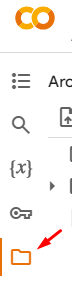

* Los otros formatos son para otros usos, pero el VTT es interesante debido a que se puede aplicar efectos al subtitulos a través de programas de edición de vídeo.
#  **Si tiene varios archivos que desea transcribir, únicamente debes de repetir/ejecutar desde el paso 2 en adelante para cada archivo.**